Task #8
=======

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

sns.set_theme()

Dirichlet problem:
$$
    \left\{
    \begin{array}{lcr}
        \Delta u = 0,(x,y) \in D,        \\
        u |_{\delta D }= f(x,y),         \\
        u \in C^2(D), f \in C(\delta D), \\
        D= \{ x,y: x^2 + y^2 \le 1 \},
    \end{array}
    \right.
$$
where $f(x,y) = x^2 - y^2$.

In [243]:
n, N, eps, max_step = 100, 1000, 0.05, 100.

def rand_walk(xy,eps,max_step):
    f = lambda xy: xy[0]**2 - xy[1]**2
    dr = 1 - np.sqrt(xy[0]**2 + xy[1]**2)
    step = 1
    while dr > eps and step < max_step:        #while far from the boundary
        phi = 2*np.pi*np.random.rand()         #random direction
        xy = xy + dr*np.array([np.cos(phi),np.sin(phi)]) #set new point
        dr = 1 - np.sqrt(xy[0]**2 + xy[1]**2)  #count new distance from the boundary
        step+=1
    xy = xy / np.linalg.norm(xy)               #closest boundary point
    return f(xy)

def get_f(xy,N,eps,max_step):
    out = 0
    for i in range(N):
        out += rand_walk(xy,eps,max_step)
    return out/N

X, Y = np.linspace(-1,1,n), np.linspace(-1,1,n)
X, Y = np.meshgrid(X,Y)
in_circle = X**2 + Y**2 < 1 

Z_num = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if in_circle[i,j]:
            Z_num[i,j] = get_f([X[i,j],Y[i,j]],N,eps,max_step)
        else:
            Z_num[i,j] = np.inf

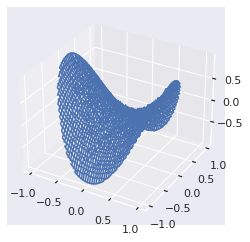

In [244]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_wireframe(X, Y, Z_num)

/home/arqa/miniconda3/envs/stochan/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


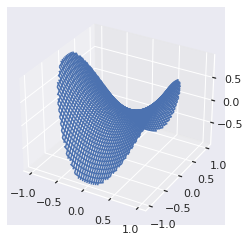

In [241]:
Z_an = X**2 - Y**2
out_circle = X**2 + Y**2 > 1 
Z_an[out_circle] = np.inf
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_wireframe(X,Y,Z_an)

